# Tensowflow基于多隐层神经网络的手写数字识别

南京大学“人工智能工程基础”和“人工智能基础与产业发展”课程，彭成磊

#### 我们构建包含2个隐藏层的三层神经网络模型来进行手写数字识别：
- 神经网络的搭建：通过定义全连接操作来简化网络搭建
- 存储模型：在检查点checkpoint保存参数
- 读取模型：通过读取ckpt文件将已训练模型用于预测

## 载入数据

In [1]:
import os
import tensorflow as tf #导入Tensorflow
import tensorflow.examples.tutorials.mnist.input_data as input_data #导入Tensorflow提供的读取MNIST的模块

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # 读取MNIST数据

KeyboardInterrupt: 

## 建立模型

多层神经网络称为全连接网络（Fully Connected Networks, FCN），有时也称为多层感知机（Multi-Layer Perceptron，MLP）。<br>
<br>
定义全连接层是构建FCN或MLP的基础，因此，我们先定义全连接层的函数fcn_layer.

In [2]:
def fcn_layer(output_dim,input_dim,inputs, activation=None):
#input_dim为输入神经元数量，output_dim为输出神经元数量
#inputs是输入的二维数组placeholder, activation是激活函数
    W = tf.Variable(tf.random_normal([input_dim, output_dim])) #以正态分布的随机数初始化W
    b = tf.Variable(tf.random_normal([1, output_dim])) #以正态分布的随机数初始化b
    XWb = tf.matmul(inputs, W) + b # 建立表达式：inputs x W + b
    if activation is None: # 默认不使用激活函数
        outputs = XWb
    else: # 若传入激活函数，则用其对输出结果进行变换
        outputs = activation(XWb)
    return outputs

### 构建输入层 

In [3]:
x = tf.placeholder("float", [None, 784])

### 构建隐藏层h1

In [4]:
# 隐藏层h1包含256个神经元
h1=fcn_layer(output_dim=256,input_dim=784,
         inputs=x ,activation=tf.nn.relu)  

Instructions for updating:
Colocations handled automatically by placer.


### 构建隐藏层h2

In [5]:
# 隐藏层h2包含256个神经元
h2=fcn_layer(output_dim=256,input_dim=256,
         inputs=h1 ,activation=tf.nn.relu)  

### 构建输出层

In [6]:
pred=fcn_layer(output_dim=10,input_dim=256,
                    inputs=h2,activation=None)


## 训练模型

### 定义损失函数

In [8]:
y = tf.placeholder("float", [None, 10])
# 交叉熵
loss_function = tf.reduce_mean( 
                  tf.nn.softmax_cross_entropy_with_logits_v2
                         (logits=pred, 
                          labels=y))

### 设置训练参数

In [9]:
train_epochs = 30
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 1
save_step=5
learning_rate = 0.001
epoch_list=[];loss_list=[];accuracy_list=[]

ckpt_dir = "./ckpt_dir/"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

from time import time
startTime=time()

每个固定间隔（save_step）在检查点保存一个模型（.ckpt文件），可便于随时将模型拿来进行预测。<br>
通常，观察前几次的预测效果就可以粗略估计出神经网络设计得是否合理。

### 选择优化器

In [10]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)  

### 定义准确率

In [11]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


### 训练并存储模型

In [12]:
#声明完所有变量后，调用tf.train.Saver
saver = tf.train.Saver()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)# 读取批次数据
        sess.run(optimizer,feed_dict={x: xs,y: ys}) # 执行批次训练
           
    #total_batch个批次训练完成后，使用验证数据计算误差与准确率   
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
    
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)    
    
    if (epoch+1) % display_step == 0:
        print("Train Epoch:", '%02d' % (epoch+1), "Loss=", "{:.9f}".format(loss)," Accuracy=","{:.4f}".format(acc))
    if (epoch+1) % save_step == 0:
            saver.save(sess, os.path.join(ckpt_dir, 'mnist_h256_h256_model_{:06d}.ckpt'.format(epoch+1)))#存储模型
            print('mnist_h256_h256_model_{:06d}.ckpt saved'.format(epoch+1))

# 显示运行总时间    
duration =time()-startTime
print("Train Finished takes:","{:.2f}".format(duration))

saver.save(sess, os.path.join(ckpt_dir, 'mnist_h256_h256_model.ckpt'))#生成检查点文件
print("Model saved!")

Train Epoch: 01 Loss= 55.957214355  Accuracy= 0.8570
Train Epoch: 02 Loss= 35.821395874  Accuracy= 0.9006
Train Epoch: 03 Loss= 27.395149231  Accuracy= 0.9158
Train Epoch: 04 Loss= 22.430706024  Accuracy= 0.9230
Train Epoch: 05 Loss= 19.523572922  Accuracy= 0.9322
mnist_h256_h256_model_000005.ckpt saved
Train Epoch: 06 Loss= 17.784996033  Accuracy= 0.9350
Train Epoch: 07 Loss= 16.119424820  Accuracy= 0.9362
Train Epoch: 08 Loss= 14.292271614  Accuracy= 0.9370
Train Epoch: 09 Loss= 14.805101395  Accuracy= 0.9390
Train Epoch: 10 Loss= 13.749901772  Accuracy= 0.9426
mnist_h256_h256_model_000010.ckpt saved
Train Epoch: 11 Loss= 12.748352051  Accuracy= 0.9440
Train Epoch: 12 Loss= 12.217568398  Accuracy= 0.9460
Train Epoch: 13 Loss= 11.316860199  Accuracy= 0.9490
Train Epoch: 14 Loss= 11.327713013  Accuracy= 0.9498
Train Epoch: 15 Loss= 11.259290695  Accuracy= 0.9496
mnist_h256_h256_model_000015.ckpt saved
Train Epoch: 16 Loss= 11.152849197  Accuracy= 0.9514
Train Epoch: 17 Loss= 10.8580245

从上述结果可以发现，包含2个隐层的神经网络的分类性能可能并没有明显比仅包含一个隐层的神经网络更优。因为一个神经网络模型的性能取决于多个方面，例如：是否具备与训练参数数量相符的训练样本数量、超参数的设置、初始化和学习率的调整策略等等，因此，单纯地通过增加层数并不一定会获得明显的性能提高，甚至有可能下降。

In [13]:
sess.close()

## 进行预测

在建立模型并进行训练后，若认为在验证集上的准确率可以接受，则可以使用此模型进行预测。<br>
我们之前通过** tf.train.Saver **对已训练的模型进行了保存，我们可以在./ckpt_dir/文件夹下找到相关文件。

共包含16个文件，包括，5个.data文件，5个.index文件，5个.meta文件，以及1个检查点文件checkpoint。<br>
可以发现无论迭代训练多少次，检查点文件中最多只保存当前最新5个模型，这是Tensorflow中默认的设置。

### 读取模型

In [16]:
print("Starting another session for prediction")
saver = tf.train.Saver()

sess = tf.Session() 
init = tf.global_variables_initializer() 
sess.run(init)

ckpt = tf.train.get_checkpoint_state(ckpt_dir)

if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, ckpt.model_checkpoint_path)# 从已保存的模型中读取参数
print ("Accuracy:", accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels}))       

Starting another session for prediction
INFO:tensorflow:Restoring parameters from ./ckpt_dir/mnist_h256_h256_model.ckpt
Accuracy: 0.9598


### 可视化

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

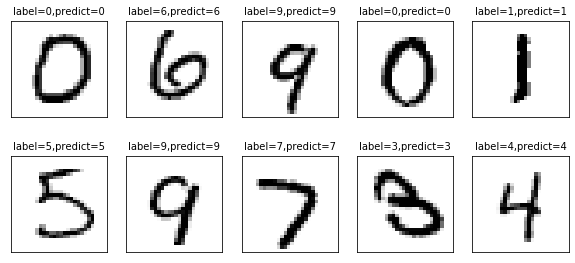

In [21]:
prediction_result=sess.run(tf.argmax(pred,1), # 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字
                           feed_dict={x: mnist.test.images })
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,10)

## 找出预测错误

In [23]:
count=0
for i in range(500):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])
        count+=1
print("count=", count)
    

i=33   label= 4 predict= 2
i=63   label= 3 predict= 8
i=92   label= 9 predict= 8
i=119   label= 2 predict= 8
i=149   label= 2 predict= 3
i=151   label= 9 predict= 3
i=193   label= 9 predict= 8
i=195   label= 3 predict= 8
i=217   label= 6 predict= 5
i=224   label= 1 predict= 4
i=233   label= 8 predict= 3
i=244   label= 2 predict= 3
i=247   label= 4 predict= 2
i=259   label= 6 predict= 0
i=266   label= 8 predict= 0
i=303   label= 2 predict= 7
i=318   label= 2 predict= 3
i=324   label= 0 predict= 9
i=362   label= 2 predict= 7
i=381   label= 3 predict= 7
i=389   label= 9 predict= 7
i=421   label= 2 predict= 5
i=444   label= 2 predict= 8
i=445   label= 6 predict= 0
i=449   label= 3 predict= 5
count= 25


In [24]:
sess.close()